In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv("WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [3]:
## Data Preprocessing 

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [5]:
df.duplicated().sum() # Checking 

0

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Statistical summary 

In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


## Feature selection using Correlation

<Axes: >

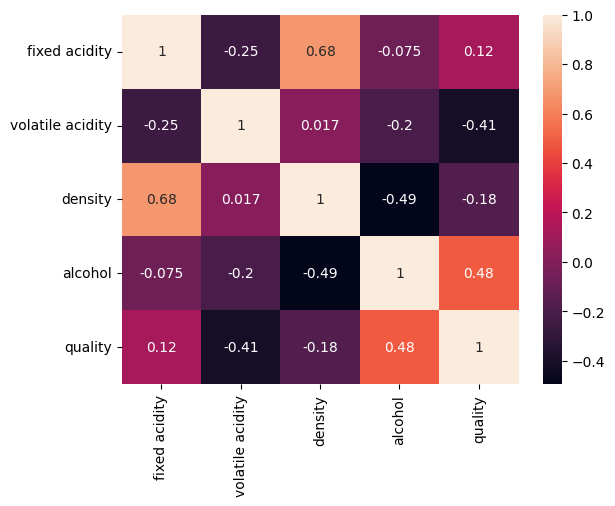

In [9]:
sns.heatmap(df[['fixed acidity', 'volatile acidity', 'density', 'alcohol', 'quality']].corr(), annot=True)

In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
fixed acidity,1.000000,-0.250728,0.673157,0.171831,0.107889,-0.164831,-0.110628,0.681501,-0.685163,0.174592,-0.075055,0.121970,-0.275826
volatile acidity,-0.250728,1.000000,-0.544187,-0.005751,0.056336,-0.001962,0.077748,0.016512,0.221492,-0.276079,-0.203909,-0.407394,-0.007892
citric acid,0.673157,-0.544187,1.000000,0.175815,0.245312,-0.057589,0.036871,0.375243,-0.546339,0.331232,0.106250,0.240821,-0.139011
residual sugar,0.171831,-0.005751,0.175815,1.000000,0.070863,0.165339,0.190790,0.380147,-0.116959,0.017475,0.058421,0.022002,-0.046344
chlorides,0.107889,0.056336,0.245312,0.070863,1.000000,0.015280,0.048163,0.208901,-0.277759,0.374784,-0.229917,-0.124085,-0.088099
free sulfur dioxide,-0.164831,-0.001962,-0.057589,0.165339,0.015280,1.000000,0.661093,-0.054150,0.072804,0.034445,-0.047095,-0.063260,0.095268
total sulfur dioxide,-0.110628,0.077748,0.036871,0.190790,0.048163,0.661093,1.000000,0.050175,-0.059126,0.026894,-0.188165,-0.183339,-0.107389
density,0.681501,0.016512,0.375243,0.380147,0.208901,-0.054150,0.050175,1.000000,-0.352775,0.143139,-0.494727,-0.175208,-0.363926
pH,-0.685163,0.221492,-0.546339,-0.116959,-0.277759,0.072804,-0.059126,-0.352775,1.000000,-0.185499,0.225322,-0.052453,0.132904
sulphates,0.174592,-0.276079,0.331232,0.017475,0.374784,0.034445,0.026894,0.143139,-0.185499,1.000000,0.094421,0.257710,-0.103954


<Axes: xlabel='quality', ylabel='density'>

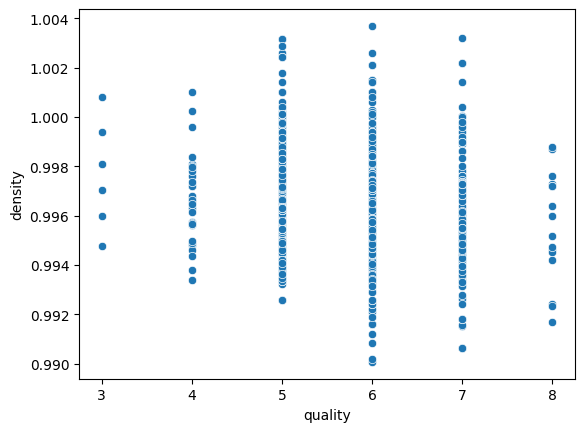

In [11]:
sns.scatterplot(x=df['quality'], y=df['density'])

<function matplotlib.pyplot.show(close=None, block=None)>

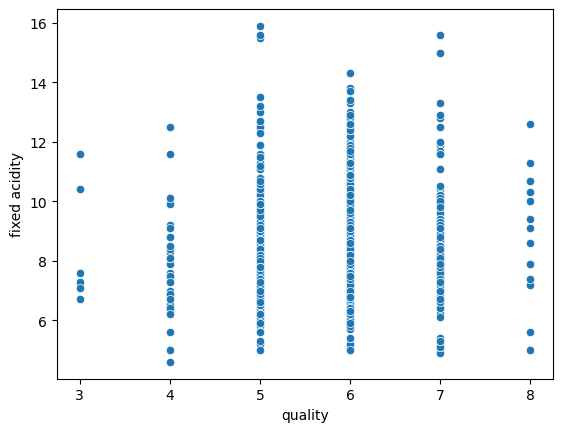

In [12]:
sns.scatterplot(x=df['quality'], y=df['fixed acidity'])

plt.show

<Axes: xlabel='quality', ylabel='volatile acidity'>

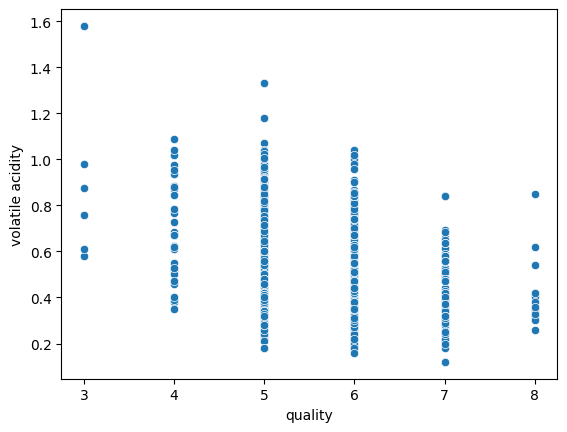

In [13]:
sns.scatterplot(x=df['quality'], y=df['volatile acidity'])

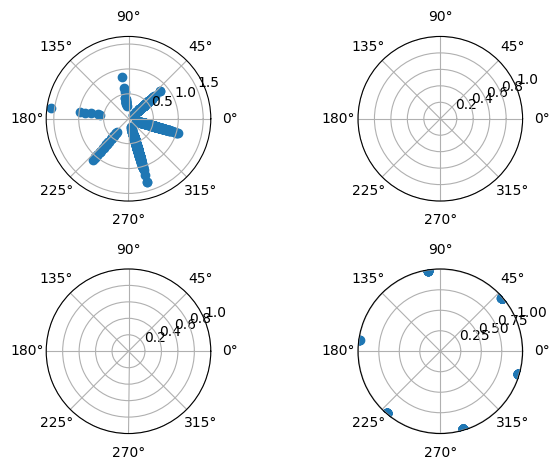

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=2,
                        subplot_kw = dict(polar = True))
axs[0, 0].scatter(df['quality'], df['volatile acidity'])
axs[1, 1].scatter(df['quality'], df['density'])
plt.tight_layout()
plt.show()

## Feature selection using Random foreset features importance

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
X = df.drop(columns=['quality', 'Id'])
y = df['quality']


rf_model = RandomForestClassifier()
rf_model.fit(X, y)


feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)


print(feature_importances)

                 Feature  Importance
10               alcohol    0.151394
9              sulphates    0.116282
1       volatile acidity    0.103586
6   total sulfur dioxide    0.101166
7                density    0.086531
2            citric acid    0.079881
4              chlorides    0.076237
0          fixed acidity    0.075550
8                     pH    0.075481
3         residual sugar    0.068603
5    free sulfur dioxide    0.065288


## Feature Selection using backword selection

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

In [31]:
X= df.drop(['quality', 'Id'], axis=1)
y= df['quality']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit(X_test)

In [33]:
lr = LinearRegression()
sfs= SequentialFeatureSelector(lr, k_features='best', forward=False, scoring='r2', cv=5)
sfs.fit(X_train, y_train)

SequentialFeatureSelector(estimator=LinearRegression(), forward=False,
                          k_features=(1, 11), scoring='r2')

In [34]:
feature_selected= sfs.k_feature_names_

In [35]:
feature_selected

('volatile acidity',
 'citric acid',
 'chlorides',
 'total sulfur dioxide',
 'pH',
 'sulphates',
 'alcohol')

['1', '2', '4', '6', '8', '9', '10']

In [36]:
new_df= df[list(feature_selected)].join(y)

In [37]:
new_df

,volatile acidity,citric acid,chlorides,total sulfur dioxide,pH,sulphates,alcohol,quality
0,0.700,0.00,0.076,34.0,3.51,0.56,9.4,5
1,0.880,0.00,0.098,67.0,3.20,0.68,9.8,5
2,0.760,0.04,0.092,54.0,3.26,0.65,9.8,5
3,0.280,0.56,0.075,60.0,3.16,0.58,9.8,6
4,0.700,0.00,0.076,34.0,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...
1138,0.510,0.13,0.076,40.0,3.42,0.75,11.0,6
1139,0.620,0.08,0.068,38.0,3.42,0.82,9.5,6
1140,0.600,0.08,0.090,44.0,3.45,0.58,10.5,5
1141,0.550,0.10,0.062,51.0,3.52,0.76,11.2,6


## Model Random forest classifier

In [38]:
X= new_df.drop(columns="quality", axis=1)
y= new_df['quality']
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf= RandomForestClassifier()
rf.fit(x_train, Y_train)

RandomForestClassifier()

In [39]:
y_pred= rf.predict(x_test)

In [43]:
print("Random Forest Accuracy:", accuracy_score(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Random Forest Accuracy: 0.6681222707423581
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.72      0.77      0.74        96
           6       0.63      0.65      0.64        99
           7       0.65      0.58      0.61        26
           8       0.00      0.00      0.00         2

    accuracy                           0.67       229
   macro avg       0.40      0.40      0.40       229
weighted avg       0.65      0.67      0.66       229



## Random forest without feature selection 

In [44]:
x1= df.drop(columns=['quality', 'Id'], axis=1)
y1= df['quality']
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.2, random_state=42)
rf= RandomForestClassifier()
rf.fit(x1_train, y1_train)
pred = rf.predict(x1_test)
print("Random Forest Accuracy:", accuracy_score(y1_test, pred))
print(classification_report(y1_test, pred))

Random Forest Accuracy: 0.6637554585152838
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.74      0.72        96
           6       0.62      0.66      0.64        99
           7       0.70      0.62      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.40      0.40       229
weighted avg       0.64      0.66      0.65       229



# Stochastic Gradient Descent Classifier with Feature selection

In [45]:
from sklearn.linear_model import SGDClassifier

In [46]:
new_df
x2= new_df.drop(columns="quality", axis=1)
y2= new_df['quality']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2, random_state=42)
sgd = SGDClassifier()
sgd.fit(x2_train, y2_train)
y_pred= sgd.predict(x2_test)
print("SGD Accuracy:", accuracy_score(y2_test, y_pred))
print(classification_report(y2_test, y_pred))

SGD Accuracy: 0.5982532751091703
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.59      0.91      0.71        96
           6       0.63      0.47      0.54        99
           7       0.50      0.12      0.19        26
           8       0.00      0.00      0.00         2

    accuracy                           0.60       229
   macro avg       0.34      0.30      0.29       229
weighted avg       0.57      0.60      0.55       229



# Stochastic Gradient Descent Classifier without Feature selection

In [47]:
x1= df.drop(columns=['quality', 'Id'], axis=1)
y1= df['quality']
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.2, random_state=42)
sgd= SGDClassifier()
sgd.fit(x1_train, y1_train)
pred = sgd.predict(x1_test)
print("SGD Accuracy:", accuracy_score(y1_test, pred))
print(classification_report(y1_test, pred))

SGD Accuracy: 0.4585152838427948
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.45      0.99      0.62        96
           6       0.56      0.09      0.16        99
           7       0.50      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.46       229
   macro avg       0.30      0.22      0.17       229
weighted avg       0.49      0.46      0.34       229



## Support Vector Classifier (SVC) With Feature selection

In [48]:
from sklearn.svm import SVC

In [49]:
new_df
x2= new_df.drop(columns="quality", axis=1)
y2= new_df['quality']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, test_size=0.2, random_state=42)
svc = SVC()
svc.fit(x2_train, y2_train)
y_pred= svc.predict(x2_test)
print("SVC Accuracy:", accuracy_score(y2_test, y_pred))
print(classification_report(y2_test, y_pred))

SVC Accuracy: 0.5545851528384279
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.75      0.38      0.50        96
           6       0.50      0.91      0.65        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.55       229
   macro avg       0.45      0.26      0.24       229
weighted avg       0.64      0.55      0.50       229



## Support Vector Classifier (SVC) Without Feature selection

In [50]:
x1= df.drop(columns=['quality', 'Id'], axis=1)
y1= df['quality']
x1_train, x1_test, y1_train, y1_test= train_test_split(x1, y1, test_size=0.2, random_state=42)
svc= SVC()
svc.fit(x1_train, y1_train)
pred = svc.predict(x1_test)
print("SVC Accuracy:", accuracy_score(y1_test, pred))
print(classification_report(y1_test, pred))

SVC Accuracy: 0.5633187772925764
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.43      0.54        96
           6       0.51      0.88      0.64        99
           7       1.00      0.04      0.07        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.45      0.27      0.25       229
weighted avg       0.64      0.56      0.51       229



# Visualization

Text(0.5, 1.0, 'Quality distribution')

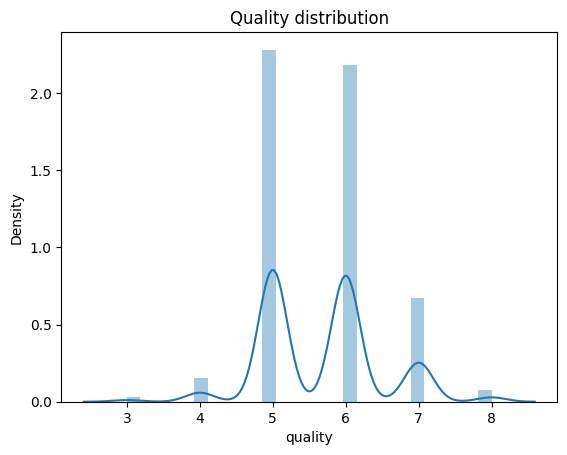

In [54]:
sns.distplot(df['quality'])
plt.title("Quality distribution")

<Axes: xlabel='volatile acidity', ylabel='fixed acidity'>

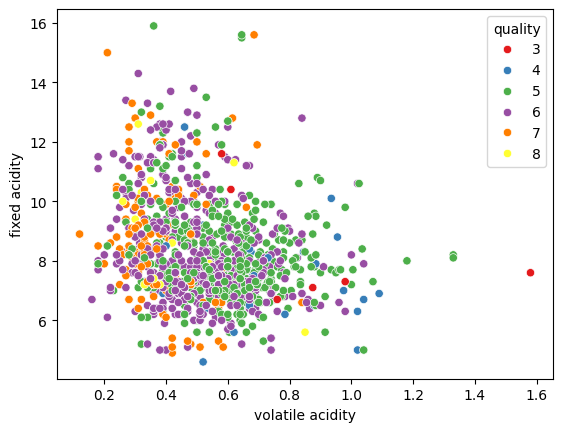

In [63]:
sns.scatterplot(y=df['fixed acidity'], x=df['volatile acidity'], hue=df['quality'], palette="Set1")

<Axes: xlabel='quality', ylabel='alcohol'>

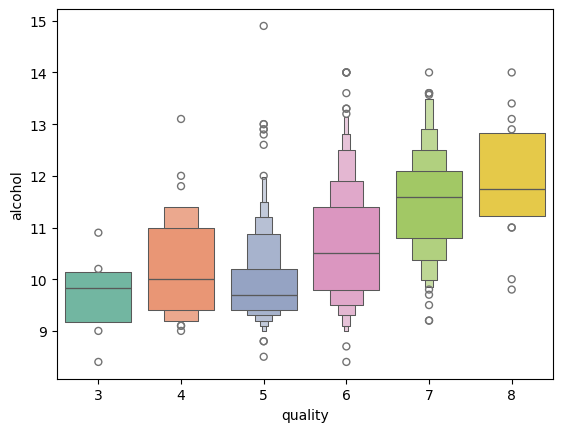

In [67]:
sns.boxenplot(x=df['quality'], y=df['alcohol'], palette="Set2")

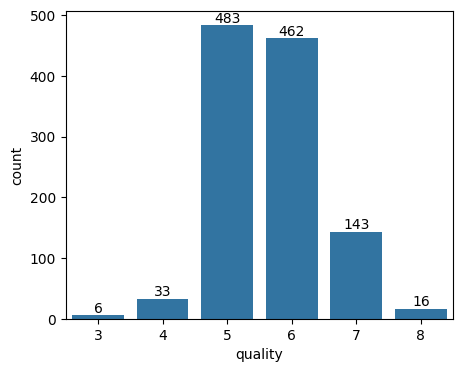

In [81]:
plt.figure(figsize=(5,4))
count = df['quality'].value_counts().reset_index().sort_values(by='count', ascending=False)
ax= sns.barplot(x='quality', y='count', data=count)
ax.bar_label(ax.containers[0])
plt.show()

# Analytical report

# Model Selection
**We will evaluate the performance of the following machine learning models:**

**Logistic Regression:** A basic classification model that works well for binary and multiclass problems.
**Random Forest Classifier:** An ensemble method that builds multiple decision trees to improve predictive accuracy.
**Gradient Boosting Machines (GBM):** An ensemble technique that builds trees sequentially to correct errors of previous trees.
**Support Vector Machines (SVM):** A classification algorithm that aims to find the best hyperplane to separate the classes.

**The wine quality dataset has an imbalanced distribution, with most wines rated between 5 and 7.**
**Among the models tested, Gradient Boosting Machines provided the best accuracy and F1-score, making it the most suitable model for this problem.**
**Features like alcohol and volatile acidity were the most significant in predicting wine quality.**
**Future improvements could include hyperparameter tuning, applying advanced techniques like neural networks, and further addressing class imbalance through techniques like SMOTE.**